In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [29]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/dynamic_translation/"

In [30]:
events = np.loadtxt(path + dataset + "events.txt")

In [31]:
events.shape

(35809924, 4)

In [32]:
calib = np.loadtxt(path + dataset + "calib.txt")

In [33]:
img = np.zeros((180, 240))
for e in events[6200000:6210000]:
    x = int(e[1])
    y = int(e[2])
    img[y, x] = 1

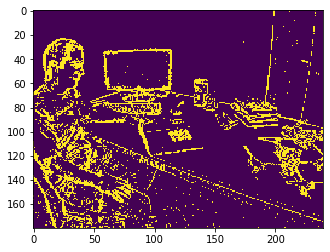

In [34]:
plt.imshow(img, interpolation="none")

In [16]:
raw_points = np.array(events[5200000:5220000,1:3])
raw_points = np.expand_dims(raw_points, 1)
print(raw_points.shape)

(20000, 1, 2)


In [17]:
cam_matrix = np.array([
    [calib[0], 0, calib[2]],
    [0, calib[1], calib[3]],
    [0, 0, 0]
], dtype=np.float32)
dist_coeffs = np.array(calib[4:])
print(dist_coeffs)

[-3.68436312e-01  1.50947244e-01 -2.96130534e-04 -7.59431726e-04
  0.00000000e+00]


In [18]:
corrected_points = cv2.undistortPoints(src=raw_points, cameraMatrix=cam_matrix, distCoeffs=dist_coeffs)

In [19]:
corrected_points[:, 0, 0] *= calib[0]
corrected_points[:, 0, 1] *= calib[1]
corrected_points[:, 0, 0] += calib[2]
corrected_points[:, 0, 1] += calib[3]

In [20]:
img = np.zeros((180, 240))
for e in corrected_points:
    x = int(e[0][0])
    y = int(e[0][1])
    if x<0 or y<0:
        continue
    try:
        img[y, x] = 1
    except Exception as e:
        continue

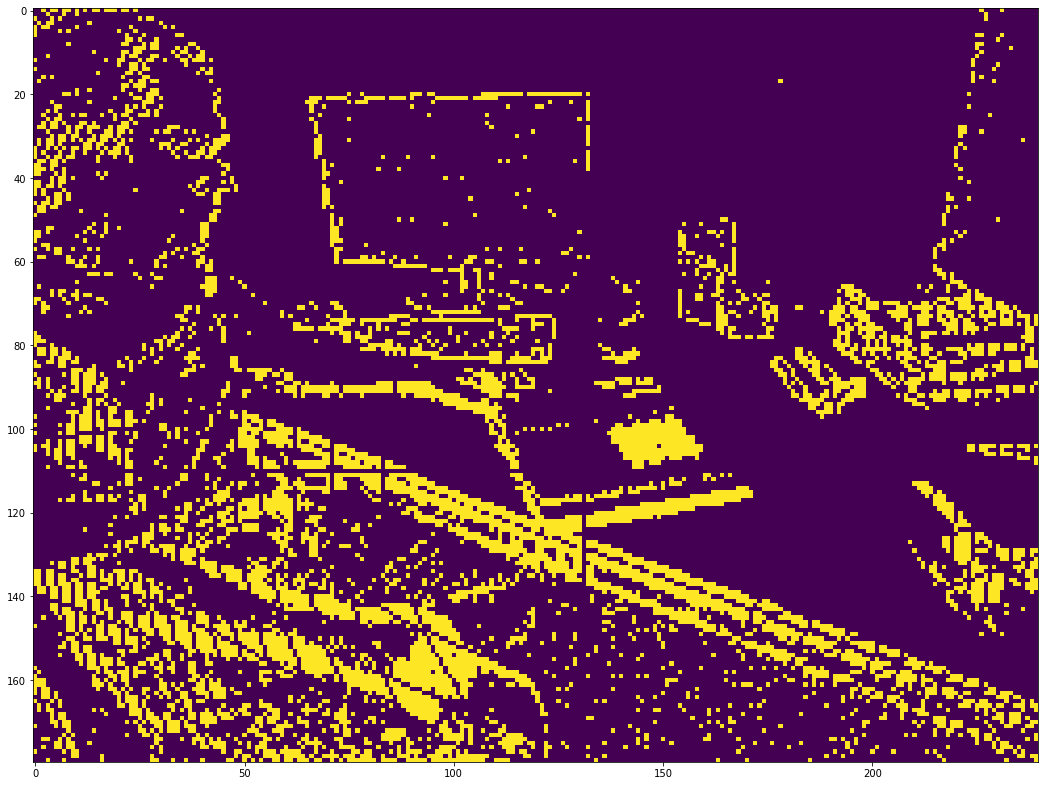

In [21]:
plt.figure(figsize=(18, 24))
plt.imshow(img, interpolation="none")

In [55]:
events_img_coord = np.expand_dims(events[:, 1:3], 1)

In [56]:
events_img_coord_corrected = cv2.undistortPoints(src=events_img_coord, cameraMatrix=cam_matrix, distCoeffs=dist_coeffs)

In [57]:
events_img_coord_corrected[:, 0, 0] *= calib[0]
events_img_coord_corrected[:, 0, 1] *= calib[1]
events_img_coord_corrected[:, 0, 0] += calib[2]
events_img_coord_corrected[:, 0, 1] += calib[3]
events_img_coord_corrected = np.squeeze(events_img_coord_corrected, 1)

In [58]:
events_corrected = np.copy(events)

In [59]:
events_corrected[:, 1:3] = events_img_coord_corrected

In [60]:
events_c_filtered = events_corrected[np.logical_and(
    events_corrected[:, 1] >= 0,
    events_corrected[:, 1] < 240)]

In [61]:
events_c_filtered = events_c_filtered[np.logical_and(
    events_c_filtered[:, 2] >= 0,
    events_c_filtered[:, 2] < 180)]

In [70]:
img = np.zeros((180, 240))
for e in events_c_filtered[200000:210000]:
    x = int(e[1])
    y = int(e[2])
    img[y, x] = 1

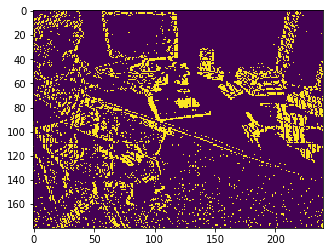

In [71]:
plt.imshow(img, interpolation="none")

In [54]:
events_c_filtered

array([[3.00000000e-06, 5.00884873e-01, 1.34170781e-01, 1.00000000e+00],
       [6.99900000e-06, 1.56250138e-01, 3.19337039e-02, 1.00000000e+00],
       [4.80000000e-05, 2.53686316e-02, 3.54142332e-01, 0.00000000e+00],
       ...,
       [5.97983620e+01, 6.00723363e-01, 3.23420072e-01, 0.00000000e+00],
       [5.97983730e+01, 4.22614948e-01, 6.60140234e-02, 0.00000000e+00],
       [5.97983810e+01, 3.50657805e-01, 2.94046292e-01, 0.00000000e+00]])

In [73]:
np.savetxt(path+dataset+"events_undist.txt", events_c_filtered, fmt="%.9f %d %d %d")

In [74]:
np.loadtxt(path +dataset + "events_undist.txt", max_rows=100)

array([[0.00000e+00, 2.12000e+02, 6.10000e+01, 0.00000e+00],
       [3.00000e-06, 2.31000e+02, 1.37000e+02, 1.00000e+00],
       [6.99900e-06, 1.63000e+02, 1.17000e+02, 1.00000e+00],
       [1.90000e-05, 2.10000e+01, 1.59000e+02, 0.00000e+00],
       [3.10000e-05, 1.70000e+02, 9.30000e+01, 0.00000e+00],
       [4.20000e-05, 6.40000e+01, 5.80000e+01, 0.00000e+00],
       [5.99990e-05, 1.73000e+02, 6.50000e+01, 0.00000e+00],
       [6.30000e-05, 1.62000e+02, 6.60000e+01, 0.00000e+00],
       [7.19990e-05, 1.34000e+02, 1.74000e+02, 0.00000e+00],
       [7.60000e-05, 1.57000e+02, 4.80000e+01, 1.00000e+00],
       [7.89990e-05, 6.60000e+01, 1.19000e+02, 0.00000e+00],
       [8.99990e-05, 3.60000e+01, 1.06000e+02, 0.00000e+00],
       [9.20000e-05, 1.95000e+02, 1.72000e+02, 0.00000e+00],
       [9.79990e-05, 2.06000e+02, 6.00000e+01, 0.00000e+00],
       [1.01000e-04, 1.73000e+02, 6.10000e+01, 0.00000e+00],
       [1.08000e-04, 4.70000e+01, 6.60000e+01, 0.00000e+00],
       [1.19000e-04, 5.3